In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

from ast import literal_eval

In [ ]:
credits=pd.read_csv("./tmdb/tmdb_5000_credits.csv")
movies=pd.read_csv("./tmdb/tmdb_5000_movies.csv")

In [6]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [43]:
len(credits['movie_id'])

4803

In [15]:
len(movies['id'].unique())

4803

Both datasets have 4803 records, merge both datasets on credits.movie_id = movies.id 

In [47]:
movies = movies.merge(credits, left_on='id', right_on='movie_id')

In [48]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [49]:
# drop movie_id, title_y
movies.drop(columns=['movie_id','title_y'], inplace=True)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_.

In [50]:
# rename title_x as title
movies.rename(columns={'title_x':'title'}, inplace=True)

In [51]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Recommending using Movie Rating
- `vote_average`: Metric for scoring or rating movie
1. We will use this score to calculate the score for every movie
2. Sort the scores and recommend the best rated movie to the users 

As the ratings are based on different number of votes, and some may be based on too few votes to be considered significant, we will use IMDB's weighted rating (wr) formula.

This formula provides a true 'Bayesian estimate', which takes into account the number of votes each title has received, minimum votes required to be on the list, and the mean vote for all titles:

**$$Weighted\text{ }Rating\text{ }(WR) = (\frac{v}{v+m}.R)+(\frac{m}{v+m}.C)$$**

Where:

- R = average for the movie (mean) = (Rating)
- v = number of votes for the movie = (votes)
- m = minimum votes required to be listed
- C = the mean vote across the whole report

We have R(`vote_average`) and v(`vote_count`) and C can be calculated as below.

In [52]:
C = movies['vote_average'].mean()
C

6.092171559442011

Next, we will determine an appropriate value for m: minimum votes required to be listed.

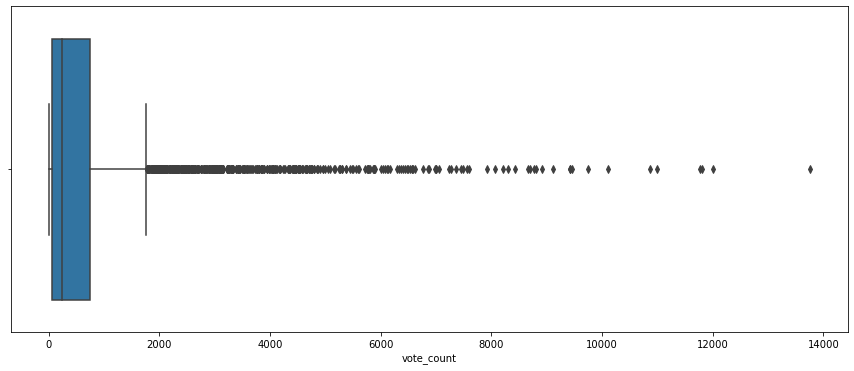

In [69]:
plt.figure(figsize=(15,6))
sns.boxplot(data=movies, x='vote_count');

- Lots of outliers with vote counts above 2000.
- More than 75% of movies have more vote counts below 1000.  

In [71]:
movies['vote_count'].describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

In [74]:
movies['vote_count'].quantile(0.2)

36.0

Taking 20th percentile of movies as a cut-off, we will use m=36. This will ensure only movies with at least 36 votes will be considered in the ranking.

In [75]:
m = movies['vote_count'].quantile(0.2)

In [77]:
movies_q = movies[movies['vote_count']>=m]
len(movies_q)

3843

3843 or 80% of the movies will be considered in the ranking.

Let's define a function to calculate the weighted rating for each movie.

In [81]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    
    return (v/(v+m) * R) + (m/(v+m) * C)

In [84]:
# create new feature 'score' for each movie
movies_q['score'] = movies_q.apply(weighted_rating, axis=1)
movies_q.head()

C:\Users\jayte\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.196630
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.893589
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.298338
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.594062
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.099870


In [89]:
# show the top 10 movies with highest scores
movies_q[['title','vote_count','vote_average','score']].sort_values(by='score', ascending=False).head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.489482
3337,The Godfather,5893,8.4,8.385987
662,Fight Club,9413,8.3,8.291588
3232,Pulp Fiction,8428,8.3,8.290609
1818,Schindler's List,4329,8.3,8.281791
3865,Whiplash,4254,8.3,8.281473
2294,Spirited Away,3840,8.3,8.279494
2731,The Godfather: Part II,3338,8.3,8.276443
65,The Dark Knight,12002,8.2,8.193696
809,Forrest Gump,7927,8.2,8.190471


In [90]:
# show the top 10 popular movies
movies_q[['title','vote_count','vote_average','score','popularity']].sort_values(by='popularity', ascending=False).head(10)

,title,vote_count,vote_average,score,popularity
546,Minions,4571,6.4,6.397595,875.581305
95,Interstellar,10867,8.1,8.093370,724.247784
788,Deadpool,10995,7.4,7.395732,514.569956
94,Guardians of the Galaxy,9742,7.9,7.893344,481.098624
127,Mad Max: Fury Road,9427,7.2,7.195785,434.278564
28,Jurassic World,8662,6.5,6.498312,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,6985,7.5,7.492781,271.972889
82,Dawn of the Planet of the Apes,4410,7.3,7.290220,243.791743
200,The Hunger Games: Mockingjay - Part 1,5584,6.6,6.596747,206.227151
88,Big Hero 6,6135,7.8,7.790037,203.734590


Top rated movies are not the most popular movies.

## Content Based Recommendation
In this recommender system, we will use the movie content (overview, cast, keyword, tagline, etc.) to find other similar movies to recommend.

### Description based Recommender
We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score.

In [91]:
# show 5 samples of overview text
movies['overview'].sample(5)

2079    As he copes with the death of his fiancee alon...
248     After five (or six) years of vanilla-wedded bl...
457     When Quinn, a grouchy pilot living the good li...
2309    On the hottest day in 50 years, a serious fire...
110     The lifelong friendship between Rafe McCawley ...
Name: overview, dtype: object

In [96]:
movies['overview'].isnull().any()

True

In [97]:
# fill missing with empty string
movies['overview'] = movies['overview'].fillna('')

In [98]:
movies['overview'].isnull().any()

False

We will use TF-IDF to create the word vector matrix for each movie overview.

In [99]:
# instantiate the tfidf model
tfidf = TfidfVectorizer(stop_words='english')

# construct the required TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movies['overview'])

tfidf_matrix.shape

(4803, 20978)

In [109]:
# view of the word vector matrix
pd.DataFrame(tfidf_matrix.toarray(),index=movies.index,columns=tfidf.get_feature_names())

,00,000,007,07am,10,100,1000,101,108,10th,...,zuckerberg,zula,zuzu,zyklon,æon,éloigne,émigré,été,única,über
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Over 20K words were used to describe the 4800 movies.

- With this matrix, we can now compute a similarity score. There are several candidates for this, the euclidean, the Pearson and the cosine similarity scores.

- We will use the cosine similarity to calculate the similarity scores between two movies. Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. So we will use linear_kernel() instead of cosine_similarity()

In [116]:
# compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [120]:
# view of the cosine similarity matrix
pd.DataFrame(cosine_sim,index=movies.index,columns=movies.index)

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
0,1.000000,0.000000,0.000000,0.024995,0.000000,0.030353,0.000000,0.037581,0.000000,0.000000,...,0.000000,0.000000,0.029175,0.042176,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.000000,0.000000,0.033369,0.000000,0.000000,0.022676,0.000000,0.000000,...,0.000000,0.000000,0.006895,0.000000,0.000000,0.000000,0.0,0.021605,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.030949,0.024830,0.000000,...,0.027695,0.000000,0.000000,0.000000,0.017768,0.000000,0.0,0.014882,0.000000,0.000000
3,0.024995,0.000000,0.000000,1.000000,0.010433,0.005145,0.012601,0.026954,0.020652,0.133740,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.033864,0.042752,0.022692
4,0.000000,0.033369,0.000000,0.010433,1.000000,0.000000,0.009339,0.037407,0.000000,0.017148,...,0.012730,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.006126,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011481,0.027528,0.000000,...,0.000000,0.011071,0.000000,0.000000,0.003788,1.000000,0.0,0.000000,0.008276,0.000000
4799,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
4800,0.000000,0.021605,0.014882,0.033864,0.006126,0.018289,0.000000,0.000000,0.029639,0.015648,...,0.011035,0.000000,0.015509,0.018922,0.000000,0.000000,0.0,1.000000,0.016091,0.007019
4801,0.000000,0.000000,0.000000,0.042752,0.000000,0.005611,0.009274,0.000000,0.035356,0.005222,...,0.000000,0.011861,0.000000,0.000000,0.000000,0.008276,0.0,0.016091,1.000000,0.011717


In [112]:
movies['title'].duplicated().sum()

3

In [113]:
# create a map of index and movie titles
movies_idx = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [114]:
movies_idx.head()

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [187]:
# define a function to return similar titles
def get_recommendations(title, cs=cosine_sim):
    # get the index for the movie title
    idx = movies_idx[title]
    
    # get the cosine similarity scores of all movies with this movie
    cs_movie = pd.Series(cs[idx], index=movies_idx.index)
    
    # filter the top-10 similar movies, excluding itself
    similar_movies = cs_movie.sort_values(ascending=False)[1:11]
    
    return similar_movies

In [124]:
get_recommendations('The Dark Knight Rises')

title
The Dark Knight                            0.301512
Batman Forever                             0.298570
Batman Returns                             0.287851
Batman                                     0.264461
Batman: The Dark Knight Returns, Part 2    0.185450
Batman Begins                              0.167996
Slow Burn                                  0.166829
Batman v Superman: Dawn of Justice         0.133740
JFK                                        0.132197
Batman & Robin                             0.130455
dtype: float64

In [125]:
get_recommendations('The Avengers')

title
Avengers: Age of Ultron            0.146374
Plastic                            0.122791
Timecop                            0.110385
This Thing of Ours                 0.107529
Thank You for Smoking              0.106203
The Corruptor                      0.097598
Wall Street: Money Never Sleeps    0.094084
Team America: World Police         0.092244
The Fountain                       0.086643
Snowpiercer                        0.086189
dtype: float64

## Credits, Genres and Keywords Based Recommender
Next, we will build a recommender using metadata: top 3 actors, the director, genre and movie plot keywords.

In [127]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

We have picked genres, keywords, cast and crew as features.

In [128]:
movies['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [129]:
movies['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [132]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [133]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [134]:
# parse the stringified features into python objects 
features = ['genres', 'keywords', 'cast', 'crew']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

In [141]:
movies['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

- The features are now a list of dictionary entries.
- Next, we will extract the director's name from the crew feature.

In [142]:
# what is the structure of the crew feature
movies['crew'][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [143]:
# function to get director's name from crew feature
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    # if there are no entry for director, return null
    return np.nan

In [144]:
movies['director'] = movies['crew'].apply(get_director)

In [145]:
movies.sample(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
2262,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,13688,"[{'id': 9736, 'name': 'little boy'}, {'id': 97...",cn,長江七號,"Ti, a really poor construction worker that str...",12.373248,"[{""name"": ""Columbia Pictures Film Production A...",...,86.0,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,It's out of this world.,CJ7,6.1,107,"[{'cast_id': 1, 'character': 'Ti Chow', 'credi...","[{'credit_id': '5747bbbe92514135c9000db9', 'de...",Stephen Chow


In [146]:
# what is the structure of the cast feature
movies['cast'][0]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

The cast entries are ordered, so we will get the first 3 entries. 

In [153]:
# function to get first 3 elements from a list
def get_from_list(x, count=99):
    names = [i['name'] for i in x]
    if len(names) > count:
        return names[:count]
    else:
        return names

In [148]:
# get top 3 cast entries
movies['cast_top3'] = movies['cast'].apply(get_from_list, 3)

In [149]:
movies.sample(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,cast_top3
3924,3800000,"[{'id': 35, 'name': 'Comedy'}]",NaN,10557,"[{'id': 187, 'name': 'islam'}, {'id': 458, 'na...",en,East Is East,In 1971 Salford fish-and-chip shop owner Georg...,3.667372,"[{""name"": ""BBC"", ""id"": 5996}, {""name"": ""Assass...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"A comedy of families, a chip shop... and a ver...",East Is East,6.5,59,"[{'cast_id': 1, 'character': 'George Khan', 'c...","[{'credit_id': '52fe43879251416c75013f09', 'de...",Damien O'Donnell,"[Om Puri, Linda Bassett, Ian Aspinall]"


In [151]:
# what is the structure of the genres feature
movies['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [154]:
# get all genres
movies['genres_all'] = movies['genres'].apply(get_from_list)

In [155]:
movies.sample(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,cast,crew,director,cast_top3,genres_all
1669,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",http://thepromisemovie.net,2008,"[{'id': 964, 'name': 'servant'}, {'id': 2280, ...",zh,Wu Ji,"An orphaned girl, driven by poverty at such a ...",3.866026,[],...,Released,the promise,The Promise,5.0,29,"[{'cast_id': 13, 'character': 'Princess Qingch...","[{'credit_id': '52fe432bc3a36847f803fb19', 'de...",Chen Kaige,"[Cecilia Cheung, Liu Ye, Hong Chen]","[Fantasy, Drama, Action, Thriller, Romance]"


In [156]:
# what is the structure of the keywords feature
movies['keywords'][0]

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [157]:
# get all keywords
movies['keywords_all'] = movies['keywords'].apply(get_from_list)

In [158]:
movies.sample(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,cast,crew,director,cast_top3,genres_all,keywords_all
1895,25000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,8051,"[{'id': 367, 'name': 'shyness'}, {'id': 1155, ...",en,Punch-Drunk Love,A beleaguered small-business owner gets a harm...,15.960916,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,NaN,Punch-Drunk Love,6.9,530,"[{'cast_id': 13, 'character': 'Barry Egan', 'c...","[{'credit_id': '52fe448ec3a36847f809cb5b', 'de...",Paul Thomas Anderson,"[Adam Sandler, Emily Watson, Philip Seymour Ho...","[Comedy, Drama, Romance]","[shyness, brother sister relationship, busines..."


In [159]:
# check the new features
features = ['title', 'director', 'cast_top3', 'genres_all', 'keywords_all']
movies[features].sample(3)

,title,director,cast_top3,genres_all,keywords_all
968,Murder by Numbers,Barbet Schroeder,"[Sandra Bullock, Ben Chaplin, Ryan Gosling]","[Crime, Drama, Thriller]","[detective, secret, fbi, homicide, evidence, n..."
2985,The Color of Money,Martin Scorsese,"[Paul Newman, Tom Cruise, Mary Elizabeth Mastr...",[Drama],"[bar, billard, talent, hustler, sport]"
3690,The Names of Love,Michel Leclerc,"[Jacques Gamblin, Sara Forestier, Zinedine Sou...","[Drama, Comedy, Romance]","[female nudity, political, voting results]"


Next, we will combine the text from these features into a metadata soup and apply word vectorizer and calculate the cosine similarities.

But first, we need to do some cleaning of the data.

In [160]:
# function to clean the text: strip spaces and convert all to lowercase
def clean_data(x):
    # parse entire list if it is a list
    if isinstance(x, list):
        return [i.replace(' ', '').lower() for i in x]
    
    # if its a string
    elif isinstance(x, str):
        return x.replace(' ', '').lower()
    
    # otherwise, return an empty string
    else:
        return ''

In [161]:
for feature in features:
    movies[feature] = movies[feature].apply(clean_data)

In [162]:
movies[features].sample(3)

,title,director,cast_top3,genres_all,keywords_all
2904,heavenisforreal,randallwallace,"[gregkinnear, kellyreilly, connorcorum]",[drama],"[basedonnovel, faith, basedontrueevents]"
1130,brüno,larrycharles,"[sachabaroncohen, richardbey, ronpaul]",[comedy],"[gay, fame, mockumentary, hollywood, lgbt, dur..."
2936,barrylyndon,stanleykubrick,"[ryano'neal, marisaberenson, hardykrüger]","[drama, romance, war]","[palace, britisharmy, fencing, epic, debt, ire..."


Next, we will combine the 4 features into a single feature.

In [178]:
# function to join the features
def create_soup(x):
    return x['director'] + ', ' + ', '.join(x['cast_top3']) + ', ' + ', '.join(x['genres_all']) + \
             ', ' + ', '.join(x['keywords_all'])

In [179]:
movies['metadata_soup'] = movies.apply(create_soup, axis=1)

In [180]:
movies.sample(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,cast,crew,director,cast_top3,genres_all,keywords_all,metadata_soup
3628,4000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.sonyclassics.com/ofgodsandmen/,46332,"[{'id': 345, 'name': 'monk'}, {'id': 813, 'nam...",fr,Des hommes et des dieux,French drama based on the 1996 kidnapping and ...,4.992475,"[{""name"": ""Why Not Productions"", ""id"": 729}, {...",...,ofgodsandmen,6.5,91,"[{'cast_id': 12, 'character': 'Christian', 'cr...","[{'credit_id': '52fe46f1c3a36847f811aedf', 'de...",xavierbeauvois,"[lambertwilson, michaellonsdale, olivierrabour...","[drama, history]","[monk, sunrise, medicine, hostage, evacuation,...","xavierbeauvois, lambertwilson, michaellonsdale..."
1014,48000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,9896,"[{'id': 585, 'name': 'casino'}, {'id': 795, 'n...",en,Rat Race,"In an ensemble film about easy money, greed, m...",18.600490,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,ratrace,6.0,518,"[{'cast_id': 9, 'character': 'Owen Templeton',...","[{'credit_id': '55f04bafc3a3684c7f000019', 'de...",jerryzucker,"[cubagoodingjr., sethgreen, whoopigoldberg]","[adventure, comedy]","[casino, running, preisgeld, millionaire, road...","jerryzucker, cubagoodingjr., sethgreen, whoopi..."
1406,35000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,2447,"[{'id': 2974, 'name': 'jesus christ'}, {'id': ...",en,The Nativity Story,Mary and Joseph make the hard journey to Bethl...,3.721272,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...",...,thenativitystory,6.4,35,"[{'cast_id': 22, 'character': 'Maria', 'credit...","[{'credit_id': '52fe4358c3a36847f804d3e7', 'de...",catherinehardwicke,"[keishacastle-hughes, oscarisaac, hiamabbass]","[drama, history]","[jesuschrist, bible, threekings, archangelgabr...","catherinehardwicke, keishacastle-hughes, oscar..."


Next, we will use the CountVectorizer() instead of TF-IDF as the more movies that a director or actor appears in, the higher the weightage should be.

In [183]:
# instantiate CountVectorizer and transform metadata_soup 
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(movies['metadata_soup'])

In [185]:
# view of the word vector matrix
pd.DataFrame(cv_matrix.toarray(),index=movies.index,columns=cv.get_feature_names())

,11,15thcentury,16thcentury,17thcentury,18thcentury,1910s,1920s,1930s,1940s,1950s,...,érictessier,étiennefaure,óscarjaenada,đỗthịhảiyến,špelacolja,γη,юлияснигирь,卧底肥妈,绝地奶霸,超级妈妈
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
# compute cosine similarity matrix
cosine_sim2 = cosine_similarity(cv_matrix, cv_matrix)

In [186]:
# view of the cosine similarity matrix
pd.DataFrame(cosine_sim2,index=movies.index,columns=movies.index)

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
0,1.000000,0.113715,0.099258,0.034483,0.232321,0.113715,0.000000,0.185695,0.095893,0.139272,...,0.000000,0.000000,0.000000,0.043769,0.000000,0.051503,0.065653,0.049629,0.0,0.0
1,0.113715,1.000000,0.109109,0.037905,0.085126,0.208333,0.000000,0.102062,0.105409,0.153093,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.056614,0.000000,0.000000,0.0,0.0
2,0.099258,0.109109,1.000000,0.099258,0.167183,0.163663,0.000000,0.200446,0.069007,0.133631,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.148250,0.000000,0.000000,0.0,0.0
3,0.034483,0.037905,0.099258,1.000000,0.038720,0.075810,0.000000,0.092848,0.000000,0.185695,...,0.046424,0.065653,0.055989,0.087538,0.107211,0.154508,0.000000,0.049629,0.0,0.0
4,0.232321,0.085126,0.167183,0.038720,1.000000,0.085126,0.043478,0.208514,0.053838,0.104257,...,0.000000,0.000000,0.000000,0.049147,0.000000,0.057831,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.051503,0.056614,0.148250,0.154508,0.057831,0.056614,0.000000,0.069338,0.000000,0.069338,...,0.000000,0.098058,0.000000,0.065372,0.160128,1.000000,0.000000,0.000000,0.0,0.0
4799,0.065653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,1.000000,0.188982,0.0,0.0
4800,0.049629,0.000000,0.000000,0.049629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.066815,0.094491,0.080582,0.062994,0.000000,0.000000,0.188982,1.000000,0.0,0.0
4801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0


In [188]:
# using cosine_sim2, get recommendations
get_recommendations('The Dark Knight Rises', cosine_sim2)

title
The Dark Knight             0.536056
Batman Begins               0.433289
Amidst the Devil's Wings    0.321634
Defendor                    0.279946
Harry Brown                 0.279946
Harsh Times                 0.279946
Batman & Robin              0.270226
In Too Deep                 0.262613
The Killer Inside Me        0.247594
Takers                      0.247594
dtype: float64

In [189]:
get_recommendations('The Godfather', cosine_sim2)

title
The Godfather: Part III     0.324443
The Godfather: Part II      0.324443
Amidst the Devil's Wings    0.272166
The Cotton Club             0.272166
The Son of No One           0.267261
10th & Wolf                 0.261488
The Rainmaker               0.261488
Black Mass                  0.235702
Donnie Brasco               0.228665
This Thing of Ours          0.223607
dtype: float64

## Collaborative Filtering
Next, we will build a recommender based off personal tastes and biases of a user. The technique used is called Collaborative Filtering and is basically of two types:
1. **User based filtering:** Recommend products to a user that similar users have liked. We can use pearson correlation or cosine similarity to measure the similarity between users. One main issue with this is that users' preference can change over time.
<img src="./images/user_based_cf.png" width="800"><br>
2. **Item based collaborative filtering:** Recommend products based on the items that the target user rated. Similarity can also be computed using Pearson Correlation or Cosine Similarity. The major difference is that with item-based CF, the similarity is calculated product wise. Two issues with this approach, scalability and sparsity. The computation grows as  more users and products get added. Lack of user ratings could contribute to high similarity.
<img src="./images/item_based_cf.png" width="800">

### Single Value Decomposition
One way to handle the scalability and sparsity issues with CF is to leverage a **latent factor model** to capture the similarity between users and items. Essentially, we will turn the recommendation problem into an optimization problem and see how well we predict the rating for items given a user and the measure of success is **RMSE**, the lower the better.

So what is a latent factor?

It is a broad idea which describes a property or concept that a user or an item have. Using music as an example, a latent factor can refer to the genre that the music belongs to. SVD **decreases the dimension** of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. This helps us to better understand the relationship between users and items as they are now directly comparable.
<img src="./images/latent_factor_model.png" width="800">

We will use the `Surprise` library to implement SVD.

In [202]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [196]:
reader = Reader()
ratings = pd.read_csv('./movielens/ratings_small.csv')

In [205]:
ratings.sample(5)

,userId,movieId,rating,timestamp
28425,212,223,4.0,1218403976
52233,381,697,4.0,1018682762
5609,30,2890,4.0,945277046
40883,294,6124,3.0,1062537014
67667,472,2407,3.0,939072217


In [198]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [201]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [203]:
svd = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8990  0.8974  0.9017  0.8918  0.8964  0.8972  0.0033  
MAE (testset)     0.6921  0.6907  0.6931  0.6895  0.6888  0.6908  0.0016  
Fit time          5.22    5.19    5.45    5.32    5.29    5.30    0.09    
Test time         0.17    0.13    0.16    0.13    0.17    0.15    0.02    


{'test_rmse': array([0.89896123, 0.89735912, 0.90170919, 0.89181474, 0.89638172]),
 'test_mae': array([0.69211731, 0.69066089, 0.69311866, 0.68945246, 0.68878981]),
 'fit_time': (5.221994400024414,
  5.1899943351745605,
  5.452350378036499,
  5.322204113006592,
  5.2895331382751465),
 'test_time': (0.17303466796875,
  0.13299870491027832,
  0.15540742874145508,
  0.1310288906097412,
  0.1702728271484375)}

- RMSE of 0.89, which is <1, good enough for our case. Next, train on the dataset and do the predictions.

In [204]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [206]:
# let's check ratings for userid==1
ratings[ratings['userId']==1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [210]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.697694079048122, details={'was_impossible': False})